# <center>**Investigating the Use of New Variables to Predict Current Condition of Bridges in the State of Texas, USA**
    
#### <center>by Kweku E. Acquaye.</center>

**Table of Contents**

1. Section 1: Introduction
  * Section 1.1: Outline
  * Section 1.2: Loading the Data
2. Section 2: Data Preparation
  * Section 2.1: Initial Exploration of Data
  * Section 2.2: Deriving New Variables
  * Section 2.3: Creating Target Variable
3. Section 3: Exploratory Data Analysis (EDA) 
  * Section 3.1: Numeric Predictors and Current Condition
  * Section 3.1.1: Visualisation by Boxplots
  * Section 3.2: Data Cleaning by Outlier Removal
  * Section 3.2.1: Standardisation by z-scores
  * Section 3.3: Visualisation by Scatter Matrix
  * Section 3.4: Visualisation by Bar Plots
  * Section 3.5: Visualisation by Histograms
  * Section 3.6: Visualisation by Heatmap
  * Section 3.7: Categorical Predictors and Current Condition
  * Section 3.7.1: Converting Categorical Values to Binary Values
  * Section 3.7.2: Partition by Material Type and Design Type
  * Section 3.8: Summary Statistics of Bridges by Material Type and Design Type
  * Section 3.8.1: Summary Statistics by Material Type
  * Section 3.8.2: Summary Statistics by Design Type
  * Section 3.9: Conditional probability of Bridge Condition by Material Type and Design Type
  * Section 3.9.1: Bridge Condition by Material Type
  * Section 3.9.2: Bridge Condition by Design Type
  * Section 3.10: Group Comparisons by Histograms
  * Section 3.10.1: Material Type Comparisons
  * Section 3.10.2: Design Type Comparisons
4. Section 4: Regression Modelling
  * Section 4.1: Continuous Predictors and Current Condition
  * Section 4.1.1: Obtaining R<sup>2</sup> and Regression Coefficients for Comparison
  * Section 4.1.2: Comparing Predictor Importance
  * Section 4.2: Estimating Errors and their Distribution
  * Section 4.2.1: Residual Errors
  * Section 4.2.2: Root Mean Squared Error (RMSE)
  * Section 4.3: Variation of Actual with Predicted Values
  * Section 4.4: Calculating Statistical p-values for Significance and Implications of $\beta$ Values
5. Section 5: Conclusions
  * Section 5.1: Using Age as Predictor
  * Section 5.2: Using Average Daily Use as Predictor
  * Section 5.3: Using Percentage Use by Trucks as Predictor
  * Section 5.4: Using Material Type as Predictor
  * Section 5.5: Using Design Type as Predictor
  * Section 5.6: Suggested Further Analysis

## **Section 1: Introduction**
This report uses modern data science methods to analyse and build correlation and regression models that look at the effect of predictor variables on a target variable. It constitutes Coursework 2 in fulfilment of the requirements of Statistics for Data Science and AI module.

**Declaration:** Some of the code used in this report has been adapted and customized from www.docs.python.org/, www.matplotlib.org/stable/, www.pandas.pydata.org/docs, www.stackoverflow.com/questions/, www.geeksforgeeks.org/, www.kite.com/python/answers/, www.codegrepper.com/, www.machinelearningmind.com/, and Statistics for Data Science and AI Lecture, Lab and Tutorial Notes.

### **Section 1.1: Outline**
The original data comes from the US National Bridge Inspection section of the the Federal Highways Agency (FHWA) website, and relates to the use and condition of bridges in Texas State. A simplified version is used in this analysis.

### **Section 1.2: Loading the Data**

In [ ]:
# Importing libraries
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

print("Libraries imported.")

Libraries imported.


In [ ]:
# Loading original data
original_df = pd.read_csv('tx19_bridges_sample.csv', index_col = 'Structure_id', error_bad_lines=False)
print("Original data loaded.")

Original data loaded.


To preserve integrity of original data file from accidental alteration, analysis would be carried out on a copy.

In [ ]:
# Creating copy to preserve original data file
safe_df1 = original_df.copy()
print("Copied version created as follows:")
safe_df1

Copied version created as follows:


,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500


There are initially 34,293 bridge records in the data to be used for analysis, and each is initially characterised by 24 variables.

## **Section 2: Data Preparation**
In this section the data is initially explored and then prepared for analysis by use of standard data science techniques.
### **Section 2.1: Initial Exploration of Data**

In [ ]:
safe_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34293 entries, 000021521-00101 to DAPTRABLI000011
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   District         34293 non-null  object 
 1   Detour_Km        34293 non-null  int64  
 2   Toll             34293 non-null  object 
 3   Maintainer       34293 non-null  object 
 4   Urban            34293 non-null  object 
 5   Status           34293 non-null  object 
 6   Year             34293 non-null  int64  
 7   Lanes_on         34293 non-null  int64  
 8   Lanes_under      34293 non-null  int64  
 9   AverageDaily     34293 non-null  int64  
 10  Historic         34293 non-null  object 
 11  Service_under    34293 non-null  object 
 12  Material         34293 non-null  object 
 13  Design           34293 non-null  object 
 14  Spans            34293 non-null  int64  
 15  Length           34293 non-null  float64
 16  Width            34293 non-null  float6

The above output shows the data type and number of entries for each column, and no empty cells.

For the current variables that indicate bridge condition (i.e. Deck rating, Superstructure rating and Substructure rating), the number of categories for each variable and the values they take are:

In [ ]:
# Listing support values for current condition variables
decR = safe_df1['Deck_rating'].unique()
print("1. There are " + str(len(decR)) + " categories in Deck rating, and they are \n" + str(decR))

supR = safe_df1['Superstr_rating'].unique()
print("\n2. There are " + str(len(supR)) + " categories in Superstructure rating, and they are \n" + str(supR))

subR = safe_df1['Substr_rating'].unique()
print("\n3. There are " + str(len(subR)) + " categories in Substructure rating, and they are \n" + str(subR))

1. There are 11 categories in Deck rating, and they are 
['Good' 'Very Good' 'Fair' 'Satisfactory' 'Excellent' 'Failed' 'Poor' nan
 'Failing' 'Serious' 'Critical']

2. There are 11 categories in Superstructure rating, and they are 
['Very Good' 'Good' 'Fair' 'Satisfactory' 'Failed' 'Poor' 'Excellent'
 'Serious' 'Failing' nan 'Critical']

3. There are 10 categories in Substructure rating, and they are 
['Very Good' 'Poor' 'Satisfactory' 'Fair' 'Good' 'Serious' 'Failed'
 'Critical' 'Excellent' 'Failing']


From the above output, it is observed that "Deck rating" and "Superstructure rating" each have 11 categories including "nan" (i.e. "not a number", essentially a dud entry), while "Substructure rating" has 10 categories and no "nan".<br>
<br>
Checking for number of missing data (i.e. number of "nan" entries):

In [ ]:
# Checking for number of missing data
safe_df1.isnull().sum()

District           0
Detour_Km          0
Toll               0
Maintainer         0
Urban              0
Status             0
Year               0
Lanes_on           0
Lanes_under        0
AverageDaily       0
Historic           0
Service_under      0
Material           0
Design             0
Spans              0
Length             0
Width              0
Deck_rating        5
Superstr_rating    2
Substr_rating      0
Rated_load         0
Trucks_percent     0
Scour_rating       0
Future_traffic     0
dtype: int64

From the above output, there are 5 missing entries from "Dec rating" and 2 from "Superstructure rating". This is insignificant compared to the total number of records in each case, hence records with missing entries can be deleted without affecting true trends observed in this analysis.<br>
<br>
The following action deletes records with missing entries:

In [ ]:
safe_df1.dropna(subset = ['Deck_rating', 'Superstr_rating', 'Substr_rating'], inplace=True)
print("Records with 'nan' cells deleted.")

Records with 'nan' cells deleted.


### **Section 2.2: Deriving New Variables**
The next step identifies and counts bridges classified as "historic" for removal, as their inclusion would likely affect the quality of overall assessment of the condition of state-wide bridges.

In [ ]:
# Checking Historic column categories
histcat = safe_df1['Historic'].unique()
print("The categories under column 'Historic' are " + str(list(histcat))) 

The categories under column 'Historic' are ['Not historic', 'Possible', 'Register', 'Unknown']


There are no bridges classified outright as "historic", but there are bridges classified as possibly historic (i.e. "Possible"), and also "Register".<br>
Calculating number and proportion of each category:

In [ ]:
print("The number of 'Not historic' bridges are " + str(sum(safe_df1['Historic']=='Not historic')) + ", and comprises " + str(round(sum(safe_df1['Historic']=='Not historic')/34293 * 100, 2)) + "% of all bridges.")
print("The number of 'Possible' bridges are " + str(sum(safe_df1['Historic']=='Possible')) + ", and comprises " + str(round(sum(safe_df1['Historic']=='Possible')/34293 * 100, 2)) + "% of all bridges.")
print("The number of 'Register' bridges are " + str(sum(safe_df1['Historic']=='Register')) + ", and comprises " + str(round(sum(safe_df1['Historic']=='Register')/34293 * 100, 2)) + "% of all bridges.")
print("The number of 'Unknown' bridges are " + str(sum(safe_df1['Historic']=='Unknown')) + ", and comprises " + str(round(sum(safe_df1['Historic']=='Unknown')/34293 * 100, 2)) + "% of all bridges.")

The number of 'Not historic' bridges are 19908, and comprises 58.05% of all bridges.
The number of 'Possible' bridges are 13903, and comprises 40.54% of all bridges.
The number of 'Register' bridges are 417, and comprises 1.22% of all bridges.
The number of 'Unknown' bridges are 58, and comprises 0.17% of all bridges.


If "Register" under the "Historic" column is taken to mean "register this bridge as historic", then it is necessary to remove them in accordance with the specifications of this task. In any case, these constitute 1.2% of state-wide bridges, so their removal would not impact the quality of analysis.

Possibly historic bridges (i.e. category "Possible") comprise 40.54% of all bridges; deleting them all would significantly impact the quality of analysis and conclusions. It might be better to combine this classification with the age of bridges and delete the very old bridges, i.e. bridges that are BOTH "possibly historic" AND "over a threshold age", i.e. intersection, "and", A n B.<br>
<br>
The following step calculates the age of every bridge and puts the result into a new column called 'Age'.

In [ ]:
# Calculating age of bridges
from datetime import date
today = date.today()
safe_df1['Age'] = today.year - safe_df1['Year']
print("Age column calculated and added.")

Age column calculated and added.


Counting unique values of Age column and arranging in increasing order:

In [ ]:
ageCol = safe_df1['Age'].unique()
ageCol.sort()
print("The unique values of the 'Age' column are " + str(list(ageCol)))

The unique values of the 'Age' column are [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 120, 121]


From the output above, it is seen that Texas bridges range in age from 2 years to 121 years. For removal from dataframe, a bridge age threshold of 100 years is chosen to combine with bridge classicication of possibly historic because this would enable removal of truly aged bridges while leaving sufficient data in the dataframe from which to draw statistically significant and valid conclusions.

Hence bridges aged 100 years and over **and also** categorised as "possible historic", bridges categorised as "Register", and those categorised as "Unknown", are removed from this analysis as follows:

In [ ]:
# Removing "Register" category
safe_df1 = safe_df1.drop(safe_df1[safe_df1['Historic'] == 'Register'].index)
print("Bridges classified as 'Register' removed from dataframe.")

# Removing "Unknown" category
safe_df1 = safe_df1.drop(safe_df1[safe_df1['Historic'] == 'Unknown'].index)
print("Bridges classified as 'Unknown' removed from dataframe.")

# Removing combined over 99 years old AND "Possible" category
safe_df1 = safe_df1.drop(safe_df1[(safe_df1['Age'] >= 100) & (safe_df1['Historic'] == 'Possible')].index)
print("Bridges that are over 99 years old AND categorised 'Possible' historic removed from dataframe.")

Bridges classified as 'Register' removed from dataframe.
Bridges classified as 'Unknown' removed from dataframe.
Bridges that are over 99 years old AND categorised 'Possible' historic removed from dataframe.


Checking if above steps of removal of bridges over 99 years old as well as possibly historic, and bridges categorised as "Register" and "Unkwown" have successfully been carried out:

In [ ]:
# Remaining bridge ages
ageCol = safe_df1['Age'].unique()
ageCol.sort()
print("The remaining bridge ages in dataframe are " + str(ageCol))

# Remaining historic categories
histCol = safe_df1['Historic'].unique()
print("\nThe remaining categories under 'Historic' column are " + str(histCol))

The remaining bridge ages in dataframe are [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]

The remaining categories under 'Historic' column are ['Not historic' 'Possible']


Check is affirmative.

With regard to the categorical variables "Material" and "Design" of bridges, it would be advantageous to merge any categories that have low counts. To check categories and their counts:

In [ ]:
# Checking material categories
safe_df1.Material.value_counts()

Concrete    26783
Steel        6394
Timber        464
Other          48
Masonry         5
Name: Material, dtype: int64

In [ ]:
# Checking design categories
safe_df1.Design.value_counts()

Beam          28056
Slab           4215
Other          1233
Arch            111
Frame            52
Truss            16
Movable           8
Suspension        3
Name: Design, dtype: int64

From the above, the threshold for merging "Material" and "Design" are decided to be counts less than 400 and 100 respectively. This is because these values are judged to be the points where the respective variables can have small categories mergerd and still retain enough variability to make meaningful comparisons.

The next steps reduce the number of categories in "Material" and "Design" columns by merging categories with less than counts of 400 and 100 respectively to create new columns "Mat_Type" and "Desgn_Type":

In [ ]:
# Defining new nominal type for material
mat_type = pd.CategoricalDtype(categories=['Concrete', 'Steel', 'Others'], ordered=False)

# Dictionary mapping existing to new values
mat_d = {'Masonry':'Others', 'Other':'Others', 'Timber':'Others'}

# Creating function to map the values
def matCatzn(row):
    if row.Material in mat_d:
        return mat_d[row.Material]
    return row.Material

# Creating new column and applying function
safe_df2 = safe_df1.assign(Mat_Type = safe_df1.apply(matCatzn, axis=1))
safe_df2 = safe_df2.astype({'Mat_Type':mat_type})
print("New dataframe with new column 'Mat_Type' created.")

New dataframe with new column 'Mat_Type' created.


In [ ]:
# Defining new nominal type for design
des_type = pd.CategoricalDtype(categories=['Beam', 'Slab', 'Arch', 'Others'], ordered=False)

# Dictionary mapping existing to new values
des_d = {'Suspension':'Others', 'Movable':'Others', 'Frame':'Others', 'Truss':'Others', 'Other':'Others'}

# Creating function to map the values
def desCatzn(row):
    if row.Design in des_d:
        return des_d[row.Design]
    return row.Design

# Creating new column and applying function
safe_df3 = safe_df2.assign(Desgn_Type = safe_df1.apply(desCatzn, axis=1))
safe_df3 = safe_df3.astype({'Desgn_Type':des_type})
print("New dataframe with new column 'Desgn_Type' created.")

New dataframe with new column 'Desgn_Type' created.


The following steps check for the creation of the new columns, and their categories:

In [ ]:
# Checking presence of new columns
safe_df3.head()

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age,Mat_Type,Desgn_Type
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,Good,Very Good,Very Good,41.7,0.0,Dry,1,16,Concrete,Slab
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,Good,Good,Very Good,41.7,0.0,Dry,1,16,Concrete,Slab
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,9,Concrete,Beam
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,Good,Good,Poor,10.0,0.0,Dry,120,71,Others,Beam
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,Good,Very Good,Very Good,37.2,4.0,Dry,200,17,Concrete,Beam


In [ ]:
# Checking combined categories of material
safe_df3.Mat_Type.value_counts()

Concrete    26783
Steel        6394
Others        517
Name: Mat_Type, dtype: int64

In [ ]:
# Checking combined categories of design
safe_df3.Desgn_Type.value_counts()

Beam      28056
Slab       4215
Others     1312
Arch        111
Name: Desgn_Type, dtype: int64

Check is affirmative.

### **Section 2.3: Creating Target Variable**

For the ordinal categorical columns "Deck rating", "Superstructure rating", and "Substructure rating" used to assess current condition, it is necessary to convert their values into numeric values so as to be able to combine them and also to perform regression analysis using obtained metrics such as R<sup>2</sup> (i.e. the coefficient of determination) and the RMSE (i.e. root mean squared error).

Converting ordinal categorical ratings to numeric ratings:

In [ ]:
# Creating dict for mapping
cond_dict = {'Failed':0, 'Failing':1, 'Critical':2, 'Serious':3, 'Poor':4, 'Fair':5, 
                'Satisfactory':6, 'Good':7, 'Very Good':8, 'Excellent':9}

# Mapping ordinal categories to intergers
safe_df3['Deck_rating'] = safe_df3.Deck_rating.map(cond_dict)
safe_df3['Superstr_rating'] = safe_df3.Superstr_rating.map(cond_dict)
safe_df3['Substr_rating'] = safe_df3.Substr_rating.map(cond_dict)
print("Ratings converted from ordinal categorical to numeric score.")

Ratings converted from ordinal categorical to numeric score.


Combining 3 ratings in a new column of total ratings named "Tot_Rating":

In [ ]:
# Creating new column of combined rating
safe_df3['Tot_Rating'] = safe_df3['Deck_rating'] + safe_df3['Superstr_rating'] + safe_df3['Substr_rating']
print("New total ratings column named 'Tot_Rating' created.")

New total ratings column named 'Tot_Rating' created.


In [ ]:
# Counting unique values of new total rating column
trat = safe_df3.Tot_Rating.unique()
trat.sort()
print("There are " + str(len(trat)) + " unique values of the new 'Tot_Rating' column, and they are " + str(list(trat)))

There are 23 unique values of the new 'Tot_Rating' column, and they are [0, 1, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


To check the number of variables in current dataframe: 

In [ ]:
print("There are now " + str(len(safe_df3.columns)) + " variables in the dataframe.")

There are now 28 variables in the dataframe.


Although not necessary, it can be advantageous for the process of kernel execution of code to remove variables that would not be used in this analysis, leaving only the variables that are to be used. The following step performs this action:

In [ ]:
# Dropping all variables except those to be used
anlys_df1 = safe_df3.filter(['Age', 'AverageDaily', 'Trucks_percent', 'Mat_Type', 'Desgn_Type', 'Tot_Rating'], axis=1)
print("Analysis table created as follows:")
anlys_df1

Analysis table created as follows:


,Age,AverageDaily,Trucks_percent,Mat_Type,Desgn_Type,Tot_Rating
Structure_id,,,,,,
000021521-00101,16,1,0.0,Concrete,Slab,23
000021521-00181,16,1,0.0,Concrete,Slab,22
000021521-TMP20,9,100,0.0,Concrete,Beam,24
000021525-00012,71,80,0.0,Others,Beam,18
000021580-00092,17,150,4.0,Concrete,Beam,23
...,...,...,...,...,...,...
DAPFORHOO000012,27,300,40.0,Concrete,Beam,21
DAPFORHOO000013,21,300,40.0,Concrete,Beam,21
DAPFORHOO000015,25,1200,25.0,Concrete,Beam,21


There are now 33,694 bridge records characterised by 6 variables, 4 of them continuous and 2 categorical.
## **Section 3: Exploratory Data Analysis (EDA)**
This section explores the data by plotting distributions of predictor and target variables, and if necessary cleans the data by removing any outliers and applying appropriate transformations to other characteristics in order to enhance the validity of analysis.

### **Section 3.1: Numeric Predictors and Current Condition**
To view data types of the variables in the new dataframe:

In [ ]:
anlys_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33694 entries, 000021521-00101 to DAPTRABLI000011
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             33694 non-null  int64   
 1   AverageDaily    33694 non-null  int64   
 2   Trucks_percent  33694 non-null  float64 
 3   Mat_Type        33694 non-null  category
 4   Desgn_Type      33694 non-null  category
 5   Tot_Rating      33694 non-null  int64   
dtypes: category(2), float64(1), int64(3)
memory usage: 1.3+ MB


This confirms 4 numeric and 2 categorical variables and their expected data types in dataframe.

Summary statistics for numerical variables in the current dataframe are:

In [ ]:
anlys_df1.describe()

,Age,AverageDaily,Trucks_percent,Tot_Rating
count,33694.000000,33694.000000,33694.000000,33694.000000
mean,38.788775,11686.656437,8.632724,20.332581
std,23.166242,24208.098077,10.363357,1.970482
min,2.000000,0.000000,0.000000,0.000000
25%,19.000000,350.000000,0.000000,19.000000
50%,35.000000,3330.000000,5.000000,21.000000
75%,56.000000,11928.750000,13.000000,22.000000
max,99.000000,543000.000000,99.000000,27.000000


### **Section 3.1.1: Visualisation by Boxplots**
Below is a visualisation of the summary statistics of distributions for quantitative predictors - samples are taken (instead of using the entire instance set) in order to obtain usable visualisations:

Text(0, 0.5, 'Current Condition')

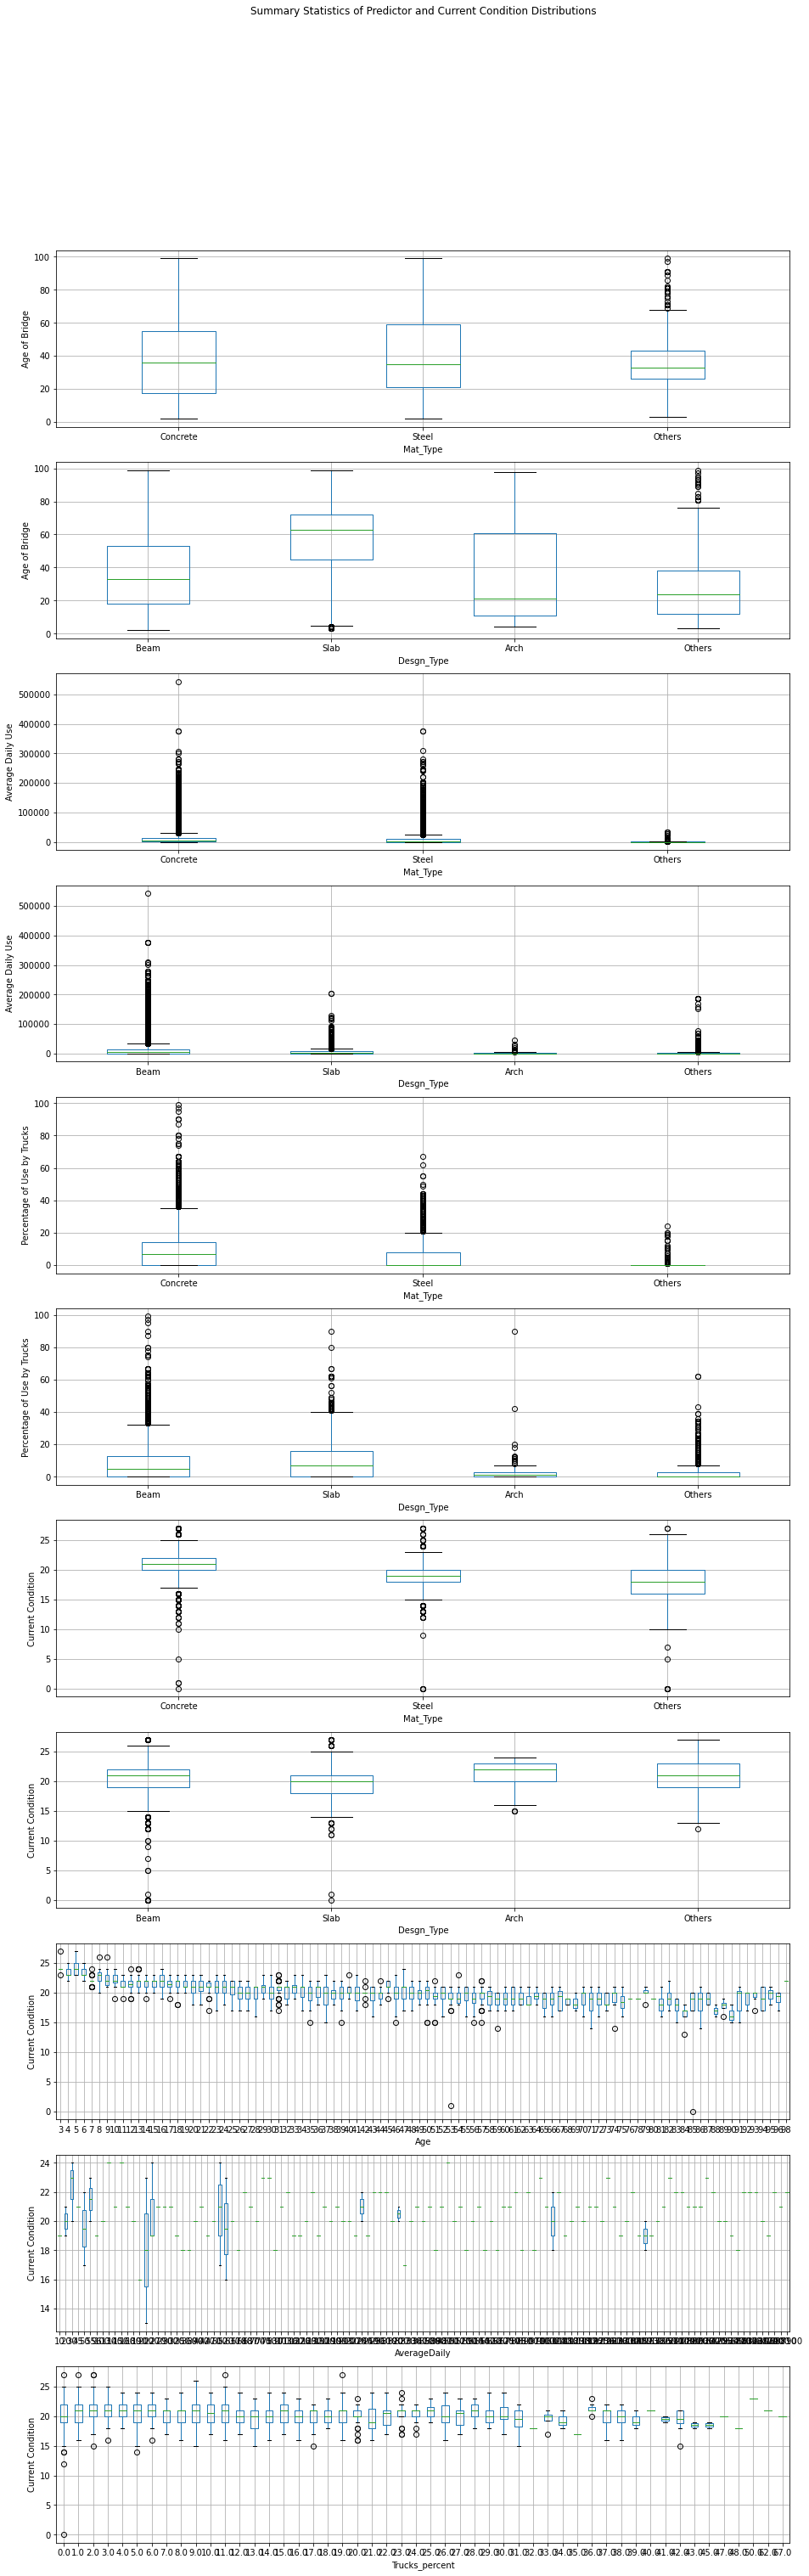

In [ ]:
# Plotting summary statistics of distributions
fig, (a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11) = plt.subplots(11,1, sharex=False, sharey=False, figsize=(15,50))

anlys_df1.boxplot(column='Age', by='Mat_Type', ax=a1)
anlys_df1.boxplot(column='Age', by='Desgn_Type', ax=a2)
anlys_df1.boxplot(column='AverageDaily', by='Mat_Type', ax=a3)
anlys_df1.boxplot(column='AverageDaily', by='Desgn_Type', ax=a4)
anlys_df1.boxplot(column='Trucks_percent', by='Mat_Type', ax=a5)
anlys_df1.boxplot(column='Trucks_percent', by='Desgn_Type', ax=a6)
anlys_df1.boxplot(column='Tot_Rating', by='Mat_Type', ax=a7)
anlys_df1.boxplot(column='Tot_Rating', by='Desgn_Type', ax=a8)
anlys_df1.sample(frac=0.04).boxplot(column='Tot_Rating', by='Age', ax=a9)
anlys_df1.sample(frac=0.004).boxplot(column='Tot_Rating', by='AverageDaily', ax=a10)
anlys_df1.sample(frac=0.05).boxplot(column='Tot_Rating', by='Trucks_percent', ax=a11)

fig.suptitle('Summary Statistics of Predictor and Current Condition Distributions')
[a.set_title('') for a in [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11]]
a1.set_ylabel('Age of Bridge')
a2.set_ylabel('Age of Bridge')
a3.set_ylabel('Average Daily Use')
a4.set_ylabel('Average Daily Use')
a5.set_ylabel('Percentage of Use by Trucks')
a6.set_ylabel('Percentage of Use by Trucks')
a7.set_ylabel('Current Condition')
a8.set_ylabel('Current Condition')
a9.set_ylabel('Current Condition')
a10.set_ylabel('Current Condition')
a11.set_ylabel('Current Condition')

The utility of boxplots is that they demonstrate any skew in the data, as well as outliers (which are shown as lying beyond the whiskers). Values or measurements that lie well outside the main body of the data, for example beyond 3 standard deviations of the mean on either side, disproportionately affect the quality of analysis and conclusions, and in some cases unjustifiably so if they are errorneous entries. From the boxplots above, it is observed that fairly considerable outliers occur in almost all distributions, thus necessitating cleaning of the data to remove outliers. 

### **Section 3.2: Data Cleaning by Outlier Removal**

Because the next series of steps need to be carried out on quantitative columns only, an appropriate dataframe consisting of only numeric variables is first created:

In [ ]:
anlys_df2 = anlys_df1.filter(['Age', 'AverageDaily', 'Trucks_percent', 'Tot_Rating'], axis=1)
anlys_df2.head()

,Age,AverageDaily,Trucks_percent,Tot_Rating
Structure_id,,,,
000021521-00101,16,1,0.0,23
000021521-00181,16,1,0.0,22
000021521-TMP20,9,100,0.0,24
000021525-00012,71,80,0.0,18
000021580-00092,17,150,4.0,23


### **Section 3.2.1: Outlier Removal by z-scores**
In the following outlier removal step, all the predictor values are first standarized by obtaining their z-scores, and then values that fall outside 3 standard deviations either side of the mean are dropped. z-scores are conversions of a predictor $x$ to $z$ by
$$z = \frac{x - \bar{x}}{s}$$
where $\bar{x}$ is the mean of variable measurements and $s$ is the sample standard deviation. Values are therefore standardised in terms of the standard devaition of all measurements. It assumes a normal distribution of variable measurements.

In [ ]:
z_scores = stats.zscore(anlys_df2)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
anlys_df3 = anlys_df2[filtered_entries]

anlys_df3.head()

,Age,AverageDaily,Trucks_percent,Tot_Rating
Structure_id,,,,
000021521-00101,16,1,0.0,23
000021521-00181,16,1,0.0,22
000021521-TMP20,9,100,0.0,24
000021525-00012,71,80,0.0,18
000021580-00092,17,150,4.0,23


To ascertain that target variable values are unaffected by the filtering step above:

In [ ]:
# Checking target variable values unaffected
tarVar = anlys_df2.Tot_Rating.unique()
tarVar.sort()
tarVar

array([ 0,  1,  5,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27], dtype=int64)

Target variable values unaffected.

### **Section 3.3: Visualisation by Scatter Matrix**
To examine whether there are any relationships between continuous predictor variables, and also with the target variable, a scatter matrix is plotted as follows:

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='AverageDaily', ylabel='Age'>,
        <AxesSubplot:xlabel='Trucks_percent', ylabel='Age'>,
        <AxesSubplot:xlabel='Tot_Rating', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='AverageDaily'>,
        <AxesSubplot:xlabel='AverageDaily', ylabel='AverageDaily'>,
        <AxesSubplot:xlabel='Trucks_percent', ylabel='AverageDaily'>,
        <AxesSubplot:xlabel='Tot_Rating', ylabel='AverageDaily'>],
       [<AxesSubplot:xlabel='Age', ylabel='Trucks_percent'>,
        <AxesSubplot:xlabel='AverageDaily', ylabel='Trucks_percent'>,
        <AxesSubplot:xlabel='Trucks_percent', ylabel='Trucks_percent'>,
        <AxesSubplot:xlabel='Tot_Rating', ylabel='Trucks_percent'>],
       [<AxesSubplot:xlabel='Age', ylabel='Tot_Rating'>,
        <AxesSubplot:xlabel='AverageDaily', ylabel='Tot_Rating'>,
        <AxesSubplot:xlabel='Trucks_percent', ylabel='Tot_Rating'>,
        <AxesSubplot:xlabel='Tot_Rating', yla

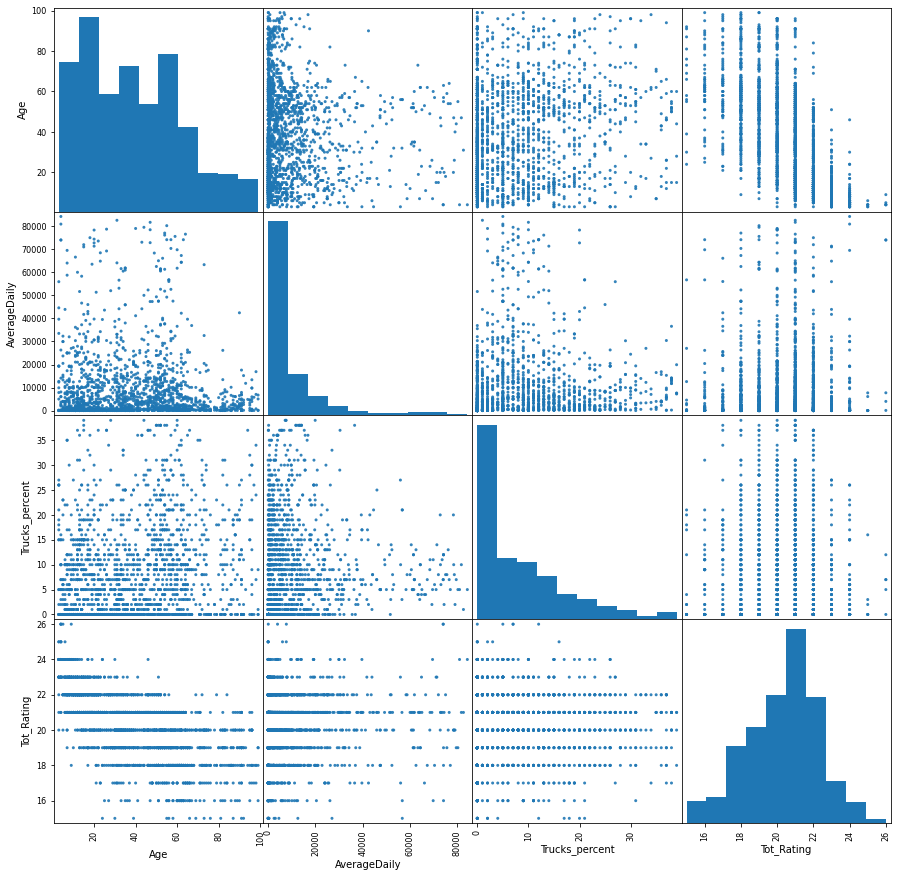

In [ ]:
_a = pd.plotting.scatter_matrix(anlys_df3.sample(frac=0.06), figsize=(15,15), diagonal='hist', alpha=0.9, range_padding=0.05)
_a

From the above pairwise combination of numeric predictor variables and target variable, with a diagonal histogram, the target variable of total rating of bridge condition is observed to have a near Normal distribution. This justifies the use of leasts squares linear regression in further analysis. The outline of an inverse relationship is observed in Age vs Total Rating plot. The outlines of Gaussian distributions are observed for Average Daily Use vs Total Ratings, and also for Percetage Truck Use vs Total Ratings. There is no observation of co-linearity nor normality between predictor variables, further making the use of least squares regression appropriate.

### **Section 3.4: Visualisation by Bar Plots**

Visualising probable relationships between all predictors and target variable, with selective log y axis for enhanced trend detection:

<AxesSubplot:xlabel='Trucks_percent'>

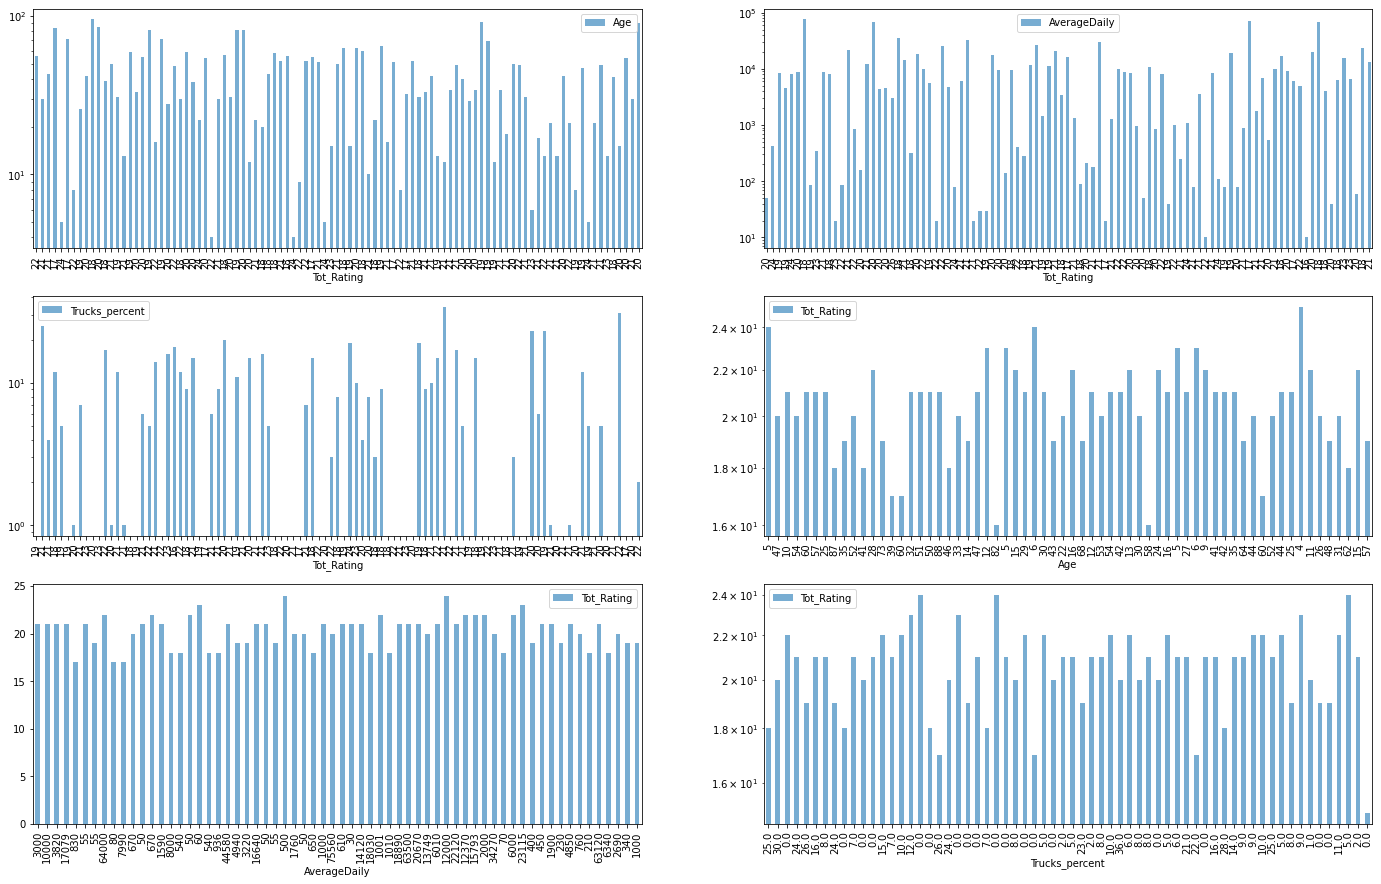

In [ ]:
# Plotting with selective log on y-axis
fig, ((a12, a13), (a14, a15), (a16, a17)) = plt.subplots(3, 2, figsize = (24, 15))

anlys_df3.sample(frac=0.003).plot(ax=a12, kind='bar', x='Tot_Rating', y='Age', logy=True, alpha=0.6)
anlys_df3.sample(frac=0.003).plot(ax=a13, kind='bar', x='Tot_Rating', y='AverageDaily', logy=True, alpha=0.6)
anlys_df3.sample(frac=0.003).plot(ax=a14, kind='bar', x='Tot_Rating', y='Trucks_percent', logy=True, alpha=0.6)
anlys_df3.sample(frac=0.002).plot(ax=a15, kind='bar', x='Age', y='Tot_Rating', logy=True, alpha=0.6)
anlys_df3.sample(frac=0.002).plot(ax=a16, kind='bar', x='AverageDaily', y='Tot_Rating', alpha=0.6)
anlys_df3.sample(frac=0.002).plot(ax=a17, kind='bar', x='Trucks_percent', y='Tot_Rating', logy=True, alpha=0.6)

Bar plots generally enable easy interpretation of large amounts of data, showing distributions and also predictor values relative to each other. The above distributions show no discernible patterns or trends between variables.

### **Section 3.5: Visualisation by Histograms**

Visualising the distribution of continuous numeric predictors and total rating as histograms:

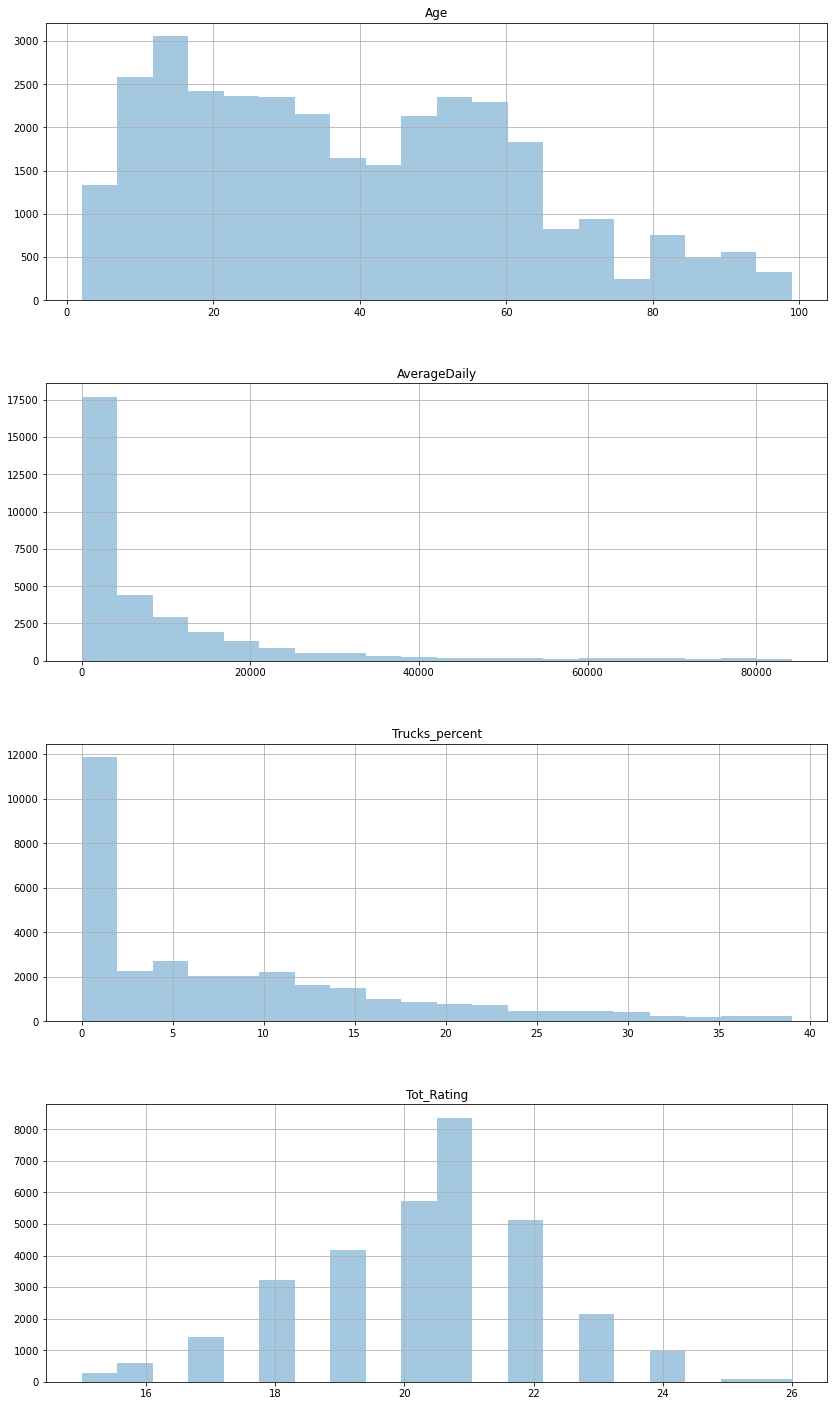

In [ ]:
# Plotting histograms
ax18 = anlys_df3.hist(bins=20, alpha=0.4, figsize=(14,25), layout=(4,1)) 

There are occasions where plotting the log to base 10 of the y-axis enables better visibility of trends, but on this occasion it was decided not to use log y because the general nature of the distributions are quite easily discernible.

The first plot above shows the distribution of bridge ages as having a gentle positive skew, i.e. there is a gradual progressive decrease in the number of bridges as age increases, after an initial short and sharp increase in number of bridges as age increases. The second plot shows the distribution of average daily use as having a sharp positive skew right from its beginning, i.e. the count of number of bridges decreases sharply with average daily use, and then settles to a long tail. The distribution of percentage use by trucks, shown by the third plot above, also exhibits a sharp positive skew, indicating a sharp decrease in count of bridges as percentage truck use increases. This distribution also has a long tail. The fourth histogram shows the distribution of target variable counts as unimodal with a gentle negative skew, meaning that the count of bridges gradually increases with increasing rating until about 20.5, and then decreases quite sharply with increasing rating. The look of near Normal distribution is an illusion as the x-axis is not evenly calibrated from zero, meaning a long negative tail which could be visualised by using log y. 


### **Section 3.6: Visualisation by Heatmap**
Visualising correlations between predictors and target variable as heatmap:

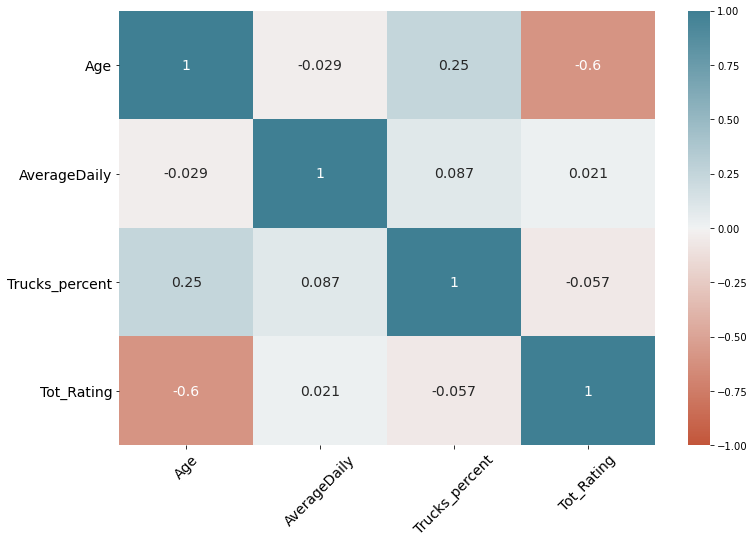

In [ ]:
# Plotting heatmap of predictors and currnt condition
fig,ax19 = plt.subplots(1,1, figsize=(12,8))
sns.heatmap(anlys_df3.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax19, annot_kws={"size": 14})
_y = plt.yticks(rotation=0, fontsize=14)
_x = plt.xticks(rotation=45, fontsize=14)

As a convenient way of easily recognising variable correlations or their lack thereof by colorisation (with added correlation coefficients also shown), the above heatmap shows the extent to which predictors as well as target variable correlate at their respective intersections. Correlation coefficients take values of -1 through 0 to +1, with -1 and +1 indicating certainty in inverse and direct correlations respectively, with strength of correlation decreasing progressively as each approaches zero. Zero indicates no correlation. With the numeric variables it is observed that, other than age which has an inverse relationship of -0.6 with total ratings, no other predictor shows any correlation that can be used to estimate condition of bridges. Other than 'Age' and 'Truck percent' with a small and spurious correlation of 0.25, the rest are negligible. The top-left to bottom right diagonal shows correlation of variable on self and expected to be 1.

### **Section 3.7: Categorical Predictors and Current Condition**
The capability of using the categorical attributes of bridge material (Mat_Type) and bridge design (Desgn_Type) in determining bridge condition is investigated in this section.

### **Section 3.7.1: Converting Categorical Values to Binary Values**<br>
The following step converts categorical variable values into integer values to enable further analysis:

In [ ]:
matType_df = pd.get_dummies(safe_df3.Mat_Type, drop_first=True)
matType_df.head()

,Steel,Others
Structure_id,,
000021521-00101,0,0
000021521-00181,0,0
000021521-TMP20,0,0
000021525-00012,0,1
000021580-00092,0,0


In [ ]:
desType_df = pd.get_dummies(safe_df3.Desgn_Type, drop_first=True)
desType_df.head()

,Slab,Arch,Others
Structure_id,,,
000021521-00101,1,0,0
000021521-00181,1,0,0
000021521-TMP20,0,0,0
000021525-00012,0,0,0
000021580-00092,0,0,0


Values of categorical variables have been converted to binary 0 and 1 representing the absence or presence respectively of the named category. In the process, 'concrete' from material type and 'beam' from design type have been dropped.

The following step appends the converted categories to the dataframe as columns or variables:

In [ ]:
left = anlys_df1
print("Mat left assigned.")

right = matType_df
print("Mat right assigned.")

withCatg_df1 = pd.merge(left, right, on="Structure_id")
print("Binary material type values added to dataframe.")

left = withCatg_df1
print("Des left assigned.")

right = desType_df
print("Des right assigned.")

withCatg_df2 = pd.merge(left, right, on="Structure_id")
print("Binary design type values added to dataframe.\nPreview (i.e. head) of current dataframe with new columns is:")

withCatg_df2.head()

Mat left assigned.
Mat right assigned.
Binary material type values added to dataframe.
Des left assigned.
Des right assigned.
Binary design type values added to dataframe.
Preview (i.e. head) of current dataframe with new columns is:


,Age,AverageDaily,Trucks_percent,Mat_Type,Desgn_Type,Tot_Rating,Steel,Others_x,Slab,Arch,Others_y
Structure_id,,,,,,,,,,,
000021521-00101,16,1,0.0,Concrete,Slab,23,0,0,1,0,0
000021521-00181,16,1,0.0,Concrete,Slab,22,0,0,1,0,0
000021521-TMP20,9,100,0.0,Concrete,Beam,24,0,0,0,0,0
000021525-00012,71,80,0.0,Others,Beam,18,0,1,0,0,0
000021580-00092,17,150,4.0,Concrete,Beam,23,0,0,0,0,0


### **Section 3.7.2: Partition by Material Type and Design Type**

To enable detailed analysis the data is partitioned as follows:

In [ ]:
# Grouping categories
gbyMat = withCatg_df2.groupby(by = 'Mat_Type')
gbyDes = withCatg_df2.groupby(by = 'Desgn_Type')
print("Material type and Design type groups created.")

Material type and Design type groups created.


The distributions of material type and design type categories can be viewed as follows:

<AxesSubplot:xlabel='Mat_Type'>

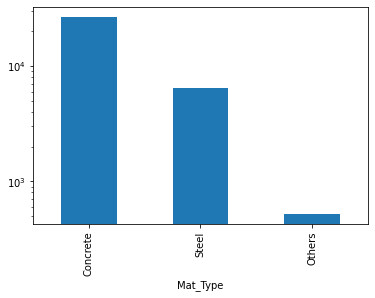

In [ ]:
gbyMat.size().plot(kind='bar', logy=True)

The distribution shows the overwhelming majority of bridges in Texas are built from concrete and number in the tens of thousands, while steel bridges number in the thousands with other material types in the hundreds.

<AxesSubplot:xlabel='Desgn_Type'>

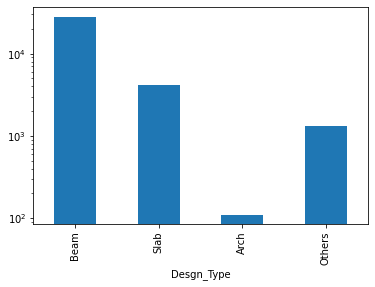

In [ ]:
gbyDes.size().plot(kind='bar', logy=True)

The distribution shows the overwhelming majority of bridges in Texas are of beam design and number in the tens of thousands, followed by slab and then other design types numbering in thousands, and lastly arch bridges numbering a few hundreds.

### **Section 3.8: Summary Statistics of Bridges by Material Type and Design Type**

### **Section 3.8.1: Summary Statistics by Material Type**

In [ ]:
def describeBy(groups, columns):
    for (index,grp) in groups:
        print('\nGroup', index)
        print('------------------')
        print(grp.loc[:,columns].describe())

describeBy(gbyMat, ['Age', 'AverageDaily', 'Trucks_percent', 'Tot_Rating'])


Group Concrete
------------------
                Age   AverageDaily  Trucks_percent    Tot_Rating
count  26783.000000   26783.000000    26783.000000  26783.000000
mean      38.174140   11988.213120        9.562110     20.669193
std       23.094727   23680.419656       10.634041      1.815094
min        2.000000       0.000000        0.000000      0.000000
25%       17.500000     680.000000        0.000000     20.000000
50%       36.000000    4050.000000        7.000000     21.000000
75%       55.000000   12390.000000       14.000000     22.000000
max       99.000000  543000.000000       99.000000     27.000000

Group Steel
------------------
               Age   AverageDaily  Trucks_percent   Tot_Rating
count  6394.000000    6394.000000     6394.000000  6394.000000
mean     41.479825   11296.265405        5.363153    19.125274
std      23.575512   26991.050591        8.514108     1.859135
min       2.000000       0.000000        0.000000     0.000000
25%      21.000000      60.000000

### **Section 3.8.2: Summary Statistics by Design Type**

In [ ]:
def describeBy2(groups, columns):
    for (index,grp) in groups:
        print('\nGroup', index)
        print('------------------')
        print(grp.loc[:,columns].describe())

describeBy2(gbyDes, ['Age', 'AverageDaily', 'Trucks_percent', 'Tot_Rating'])


Group Beam
------------------
                Age   AverageDaily  Trucks_percent    Tot_Rating
count  28056.000000   28056.000000    28056.000000  28056.000000
mean      36.660001   12958.652588        8.677894     20.401697
std       21.833338   25698.794287       10.270687      1.921067
min        2.000000       1.000000        0.000000      0.000000
25%       18.000000     420.000000        0.000000     19.000000
50%       33.000000    4000.000000        5.000000     21.000000
75%       53.000000   13500.000000       13.000000     22.000000
max       99.000000  543000.000000       99.000000     27.000000

Group Slab
------------------
               Age   AverageDaily  Trucks_percent   Tot_Rating
count  4215.000000    4215.000000     4215.000000  4215.000000
mean     56.654567    5772.539976       10.181495    19.708422
std      24.432782   11884.536328       11.311193     2.024098
min       3.000000       1.000000        0.000000     0.000000
25%      45.000000     310.000000     

The above two outputs show descriptive statistics for both material type and design type grouped by categories, thereby enabling observation of relevant details.

### **Section 3.9: Conditional Probability of Bridge Condition by Material Type and Design Type**

### **Section 3.9.1: Bridge Condition by Material Type**

In [ ]:
# Conditional probability of condition given material
totalRating_given_Mat = pd.crosstab(withCatg_df2.Tot_Rating, [withCatg_df2.Mat_Type], normalize='all')
totalRating_given_Mat.round(3) * 100

Mat_Type,Concrete,Steel,Others
Tot_Rating,,,
0,0.0,0.0,0.0
1,0.0,0.0,0.0
5,0.0,0.0,0.0
7,0.0,0.0,0.0
9,0.0,0.0,0.0
10,0.0,0.0,0.0
11,0.0,0.0,0.0
12,0.0,0.0,0.0
13,0.0,0.0,0.0


The above table shows the probability of bridge condition given construction material, as percentages. The higher the percentage, the better the condition of the bridge.

### **Section 3.9.2: Bridge Condition by Design Type**

In [ ]:
# Conditional probability of condition given design
totalRating_given_Des = pd.crosstab(withCatg_df2.Tot_Rating, [withCatg_df2.Desgn_Type], normalize='all')
totalRating_given_Des.round(3) * 100

Desgn_Type,Beam,Slab,Arch,Others
Tot_Rating,,,,
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0
13,0.1,0.0,0.0,0.0


The above table shows the probability of bridge condition given its design type, as percentages. The higher the percentage, the better the condition of the bridge.

### **Section 3.10: Group Comparisons by Histograms**

### **Section 3.10.1: Material Type Comparisons**

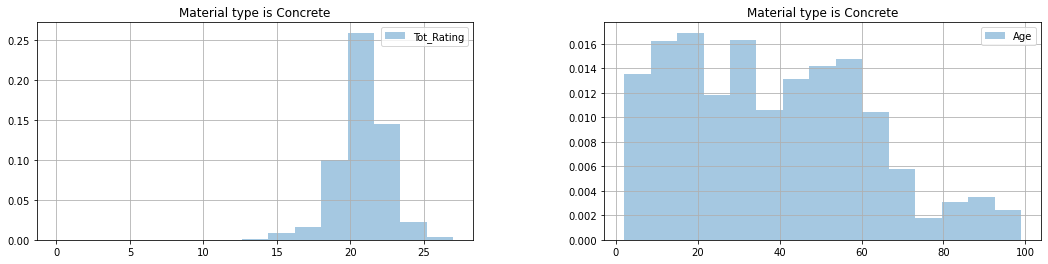

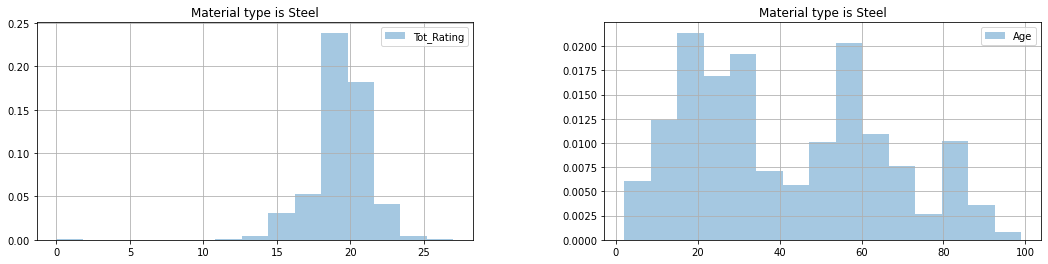

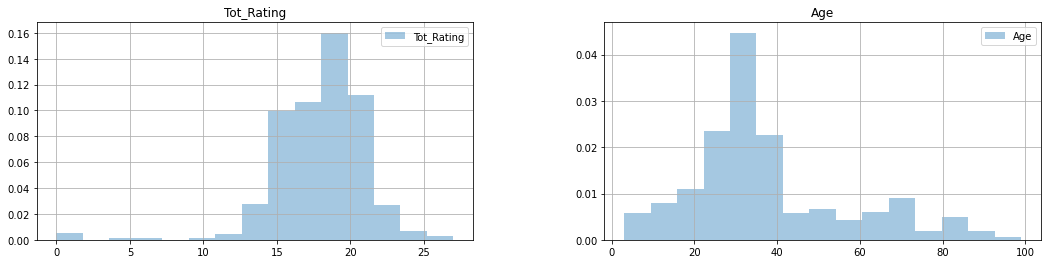

In [ ]:
# Comparing material type groups using histograms
axs22 = gbyMat.hist(column=['Tot_Rating', 'Age'], alpha=0.4, bins=15, density=True, figsize=(18,4), legend=True)

# Setting titles
names = ['Concrete', 'Steel']
_t = [axs22[name][0][col].set_title('Material type is ' + name) for name in names for col in [0,1]]

From the distributions above, it is observed that concrete bridges have a higher average rating than steel bridges, and that both material types show positive skew with age. Concrete however has a very fat left tail with age. Both material types have strong negative skews with total rating, and positive skews with age.

### **Section 3.10.2: Design Type Comparisons**

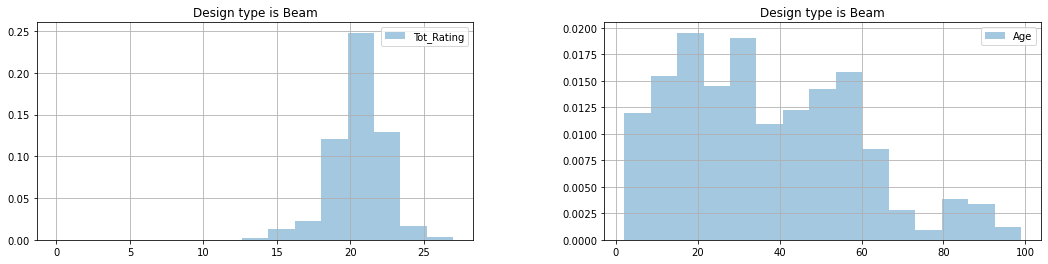

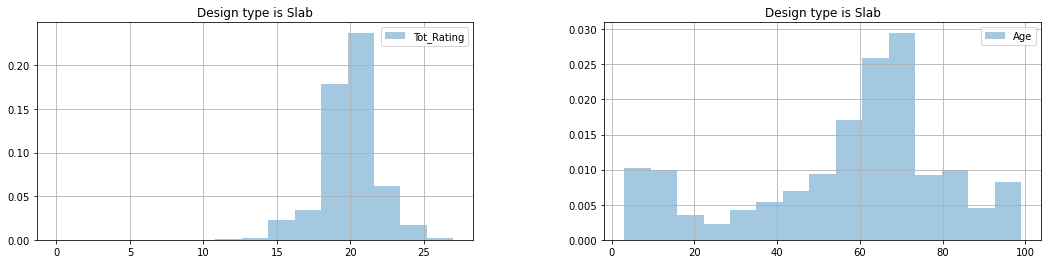

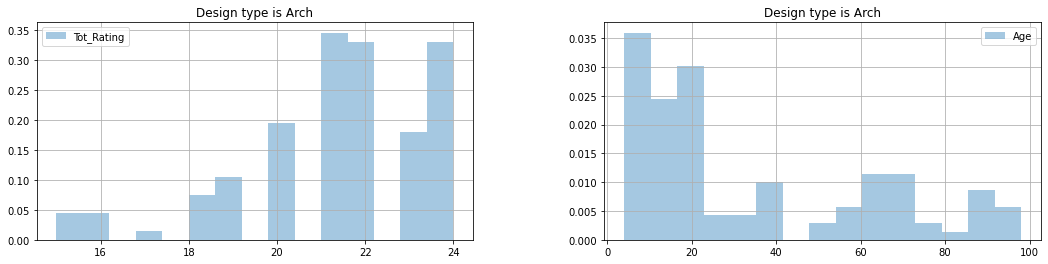

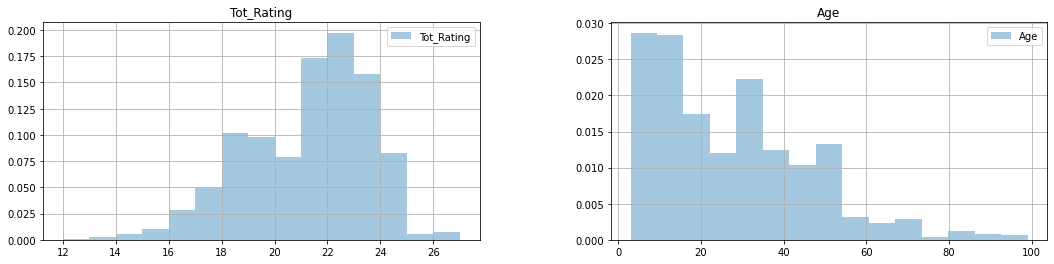

In [ ]:
# Comparing design type groups using histograms
axs23 = gbyDes.hist(column=['Tot_Rating', 'Age'], alpha=0.4, bins=15, density=True, figsize=(18,4), legend=True)

# Setting titles
names = ['Beam', 'Slab', 'Arch']
_t = [axs23[name][0][col].set_title('Design type is ' + name) for name in names for col in [0,1]]

From the distributions above, it is observed that the 3 design types of beam, slab and arch all have negative skews with total rating. While beam and arch have a positive skew with age, slab design has a negative skew. 

## **Section 4: Regression Modelling**
Section 4 uses least squares multiple linear regression methods to derive insights into the capacity of predictor variables to accurately determine bridge condition.

### **Section 4.1: Continuous Predictors and Current Condition**
Continuous numeric predictors are first analysed:

In [ ]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
print("Scikit-learn libraries imported.")

Scikit-learn libraries imported.


Regressing total ratings on all 3 numeric predictor variables:

In [ ]:
# Creating array for regression
y = anlys_df3.Tot_Rating
X = np.column_stack((anlys_df3.Age, anlys_df3.AverageDaily, anlys_df3.Trucks_percent))
X[0:5]

array([[ 16.,   1.,   0.],
       [ 16.,   1.,   0.],
       [  9., 100.,   0.],
       [ 71.,  80.,   0.],
       [ 17., 150.,   4.]])

### **Section 4.1.1: Obtaining R<sup>2</sup> and Regression Coefficients for Comparison**
Using the least squares regression method provides the coefficient of determination R<sup>2</sup> and regression coefficients $\beta$, measures which can be informative about the predictive power of predictors. R<sup>2</sup> is a relative measure of fit, whilst RMSE which is an absolute measure of fit.

In [ ]:
# Fitting regression line
reg = LinearRegression().fit(X, y)
print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))
print('The intercept on y-axis is %4.1f' % reg.intercept_)
beta_Age, beta_AverageDaily, beta_Trucks_percent = reg.coef_
print('Estimated regression coefficient $\beta$ for age is %4.2f' % beta_Age)
print('Estimated regression coefficient $\beta$ for daily average use is %4.2f' % beta_AverageDaily)
print('Estimated regression coefficient $\beta$ for percentage use by trucks is %4.2f' % beta_Trucks_percent)

The R2 coefficient of determination is 0.369
The intercept on y-axis is 22.1
Estimated regression coefficient $eta$ for age is -0.05
Estimated regression coefficient $eta$ for daily average use is -0.00
Estimated regression coefficient $eta$ for percentage use by trucks is 0.02


It is observed from the regression analysis that the mean of the target variable 'Total Rating' is 22.1 (i.e. when all predictors are zero).

From the above output, a general relationship between numeric predictor variables and total rating can be summarised as<br>
<br>
**<center>Total Rating = 22.1 - 0.05 years + 0.02 percentage use by trucks</center>**

The meaning and implications of this output and $\beta$ values are further discussed in 'Section 5: Conclusions' below.

Due to the observation of high levels of skew in the distribution of predictor variables in Sections 3.3 and 3.5 above, appropriate transformation of the data is likely to provide a better fit to regression line. The following step transforms the data by standardisation to z-scores (please refer to Section 3.2.1) before performing the least squares regression method.

In [ ]:
# Fitting regression line to z-scores
Z = StandardScaler().fit_transform(X)

reg1 = LinearRegression().fit(Z, y)
print('The R2 coefficient of determination for standardised predictors is %4.3f' % reg.score(X, y))
print('The intercept on y-axis for standardised predictors is %4.1f' % reg1.intercept_)
beta_AgeT, beta_AverageDailyT, beta_Trucks_percentT = reg1.coef_
print('Estimated regression coefficient $\beta$ for standardised Age is %4.2f' % beta_AgeT)
print('Estimated regression coefficient $\beta$ for standardised daily average use is %4.2f' % beta_AverageDailyT)
print('Estimated regression coefficient $\beta$ for standardised percentage use by trucks is %4.2f' % beta_Trucks_percentT)

The R2 coefficient of determination for standardised predictors is 0.369
The intercept on y-axis for standardised predictors is 20.4
Estimated regression coefficient $eta$ for standardised Age is -1.16
Estimated regression coefficient $eta$ for standardised daily average use is -0.01
Estimated regression coefficient $eta$ for standardised percentage use by trucks is 0.18


Using standardised values the mean of the target variable 'Total Rating' is obtained to be 22.1 (i.e. when all predictors are zero). From standardised values, the general relationship between numeric predictor variables and total rating can be summarised as<br>
<br>
**<center>Total Rating = 22.4 - 1.16 years - 0.01 daily average use + 0.02 percentage use by trucks</center>**

The implications are discussed further in 'Section 5: Conclusions'.

The next step computes the ranges of the predictor variables and the target variable. This would subsequently enable comparisons based on the distributions of the variables:

In [ ]:
# Computing ranges
age_range = anlys_df3.Age.quantile(0.99) - anlys_df3.Age.quantile(0.01)
daily_use_range = anlys_df3.AverageDaily.quantile(0.99) - anlys_df3.AverageDaily.quantile(0.01)
truck_propn_range = anlys_df3.Trucks_percent.quantile(0.99) - anlys_df3.Trucks_percent.quantile(0.01)
target_var_range = anlys_df3.Tot_Rating.quantile(0.99) - anlys_df3.Tot_Rating.quantile(0.01)

print('Age range (1st to 99th percentile) is %3.1f' % age_range, 'years.')
print('Average daily use range (1st to 99th percentile) is %3.1f' % daily_use_range, 'crossings.')
print('Truck percentage use range (1st to 99th percentile) is %3.1f' % truck_propn_range, 'percent.')
print('Current condition (1st to 99th percentile) is %3.1f' % target_var_range,'units.')

Age range (1st to 99th percentile) is 91.0 years.
Average daily use range (1st to 99th percentile) is 73330.0 crossings.
Truck percentage use range (1st to 99th percentile) is 37.0 percent.
Current condition (1st to 99th percentile) is 8.0 units.


The results of this comparison are discussed under 'Section 5: Conclusions'.

### **Section 4.1.2: Comparing Predictor Importance**
The following step compares the coefficients ($\beta$ values) of numeric predictors over their respective ranges. Because the data has already been cleaned of outliers in Section 3.2.1 and therefore need no further outlier removal, the compared ranges chosen here are from the 1st percentile to the 99th percentile (instead of the often used 10th to 90th percentiles), thereby covering essentially the entire range of remaining data in order to get better results:

In [ ]:
# Comparing coefficients
print ('1. The change in bridge condition rating (as a percent of its range) given by the age coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Age * age_range) / target_var_range),'.')

print ('\n2. The change in bridge condition rating (as a percent of its range) given by the daily average use coefficient (over its range) is %4.1f percent'
       % (100 * (beta_AverageDaily * daily_use_range) / target_var_range),'.')

print ('\n3. The change in bridge condition rating (as a percent of its range) given by the percentage use by trucks coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Trucks_percent * truck_propn_range) / target_var_range),'.')

1. The change in bridge condition rating (as a percent of its range) given by the age coefficient (over its range) is -56.9 percent .

2. The change in bridge condition rating (as a percent of its range) given by the daily average use coefficient (over its range) is -0.7 percent .

3. The change in bridge condition rating (as a percent of its range) given by the percentage use by trucks coefficient (over its range) is  9.0 percent .


From the above, it is observed that expressing the range of predictors in relation to the range of target variable and converting to percentages enables comparison of predictors. This is further discussed under Section 5: Conclusions.

### **Section 4.2: Estimating Errors and their Distribution**
Visualising distribution of errors of the predicted values:

### **Section 4.2.1: Residual Errors**
Distribution of residual errors about the mean:

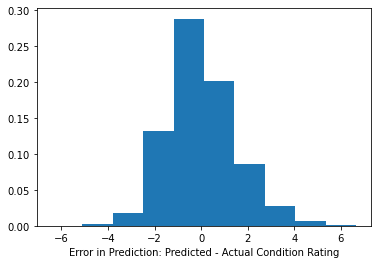

In [ ]:
# Calculating residual errors
y_hat = reg.predict(X)

fig, a20 = plt.subplots(1, 1)
residuals = y_hat - y
a20.hist(residuals, bins=10, density=True)
_ = a20.set_xlabel('Error in Prediction: Predicted - Actual Condition Rating')

The above output shows a fairly normal distribution of errors around a zero mean. This justifies the use of linear regression in the analysis of the data above, as it means residual errors of individual measurements tend to cancel out each other to a large extent. Moreover, the spread (standard deviation) of the errors around the mean is narrow relative to height and without tails. The observation of a very slight positive skew suggests a tiny bias.

### **Section 4.2.2: Root Mean Squared Error (RMSE)**

In [ ]:
# Calculating root mean squared error
print('Root of the mean squared error (RMSE) is %.2f'% mean_squared_error(y, y_hat, squared=False))

Root of the mean squared error (RMSE) is 1.48


As a measure of how wide the prediction errors (i.e. residuals) are from the regression line, the smaller the RMSE, the better. It is scale-dependent, and also a estimate of accuracy. Considering the estimation range the obtained figure of 1.48 can be described as good. It is conceptually the standard deviation of the unexplained variance.

### **Section 4.3: Variation of Actual with Predicted Values**
 The relationship of actual values to the predicted values can be seen as:

Text(0, 0.5, 'Actual Value')

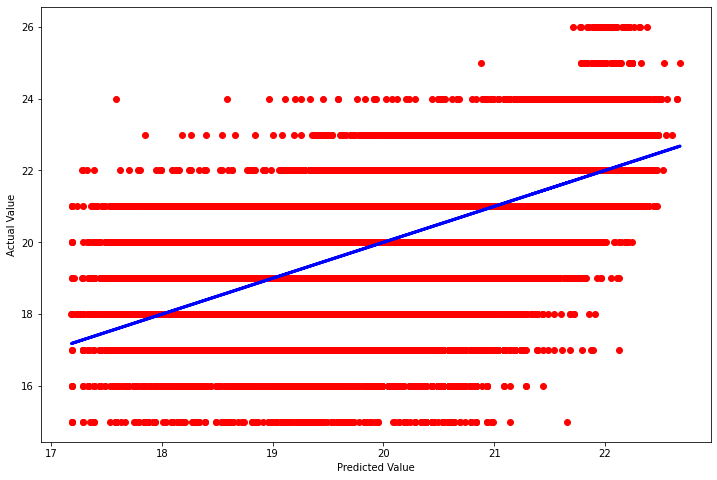

In [ ]:
# Plotting actual values vs predicted values
fig, a21 = plt.subplots(1,1,figsize=(12,8))
a21.scatter(y_hat, y,  color='red')
a21.plot(y_hat, y_hat, color='blue', linewidth=3)

a21.set_xlabel('Predicted Value')
a21.set_ylabel('Actual Value')

The above plot of  Actaul Value vs Predicted Value provides an indication of the capacity of the suggested predictor variables, when combined, to determine the condition of bridges. A direct linear relationship is observed, indicating that there is capacity of predictor variables in combination to determine condition of bridges.

### **Section 4.4: Calculating Statistical p-values for Significance and Implications of $\beta$ Values**
The $\beta$ regression coefficients obtained in Section 4.1.1 can be considered as descriptions of the mathematical relationship between each predictor variable and the target variable. Their statistical significance is determined by their p-values. The steps below attempt to calculate these p-values:

In [ ]:
# Dropping all variables except those to be used
withCatg_df3 = withCatg_df2.filter(['Age', 'AverageDaily', 'Trucks_percent', 'Steel', 'Others_x', 'Slab', 'Arch', 'Others_y', 'Tot_Rating'], axis=1)
print("Regression for p-values table created, and a preview is:")
withCatg_df3.head()

Regression for p-values table created, and a preview is:


,Age,AverageDaily,Trucks_percent,Steel,Others_x,Slab,Arch,Others_y,Tot_Rating
Structure_id,,,,,,,,,
000021521-00101,16,1,0.0,0,0,1,0,0,23
000021521-00181,16,1,0.0,0,0,1,0,0,22
000021521-TMP20,9,100,0.0,0,0,0,0,0,24
000021525-00012,71,80,0.0,0,1,0,0,0,18
000021580-00092,17,150,4.0,0,0,0,0,0,23


In [ ]:
# Computing regression results
x = withCatg_df3[withCatg_df3.columns[withCatg_df3.columns != 'Tot_Rating']]
y = withCatg_df3.Tot_Rating
 
# Adding required constant for Statsmodels.OLS
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Tot_Rating   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     3436.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        02:07:57   Log-Likelihood:                -60612.
No. Observations:               33694   AIC:                         1.212e+05
Df Residuals:                   33685   BIC:                         1.213e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             22.5098      0.017   1290.

The p-values obtained above are calculated for 95% confidence limits, hence a p-value of 0.05 and less means that there is only 5% or less chance that results from the data occurred by chance. The observed values relating to the bridge predictor variables are discussed in 'Section 5: Conclusions' below.

## **Section 5: Conclusions**
It must be noted that generally, correlation is not evidence of causation. There are however instances where correlation shows causation, i.e. dependence of one variable on another.

From all of the analysis carried out above, the following conclusions can be drawn:

### **Section 5.1: Using Age as Predictor**

From visualisations of predictor variable distributions and also variations of current condition total rating with predictor variables in Section 3 above, it was observed that 'Age' on its own could be used as a predictor of current bridge condition. From the observation of a direct linear relationship between predicted and actual values in Section 4.3, the 'Age' variable can also be used in combination with other variables to determine condition of bridges.

From Section 4.1.2, the change in bridge condition rating (as a percent of its range) given by the age coefficient (over its range) is -56.9 percent. This, in comparison to the other proposed predictors, shows 'Age' as by far the most important predictor and strongest candidate for use in determining the condition of bridges. The negative sign implies inverse relationship.

The age of bridges, regressed with bridge condition when numeric predictors are combined, gave a $\beta$ value of -0.05, and -1.16 when standardised. This implies a negative correlation of age with bridge condition, i.e. as age increases the condition of the bridge is observed to decrease. This is to be expected. The p-value for the regression coefficient $\beta$ for age, from Section 4.4, is obtained to be 0.000 at 3 decimal places. Since this is less than 0.05, it can be concluded that the contribution of the age variable is signicant and not due to chance.

### **Section 5.2: Using Average Daily Use as Predictor**
Visualisations of predictor variable distributions and also variations of current condition total rating with predictor variables in Section 3 above showed no evidence that 'Average Daily' on its own could be used as a predictor of current bridge condition. Observation of a direct linear relationship between predicted and actual values in Section 4.3 suggests 'Average Daily' in combination with other predictors could determine condition of bridges.

From Section 4.1.2, the change in bridge condition rating (as a percent of its range) given by the daily average use coefficient (over its range) is -0.7 percent. The negative sign shows an inverse relationship with total rating, it is the absolute value of 0.7 that matters. This shows 'Average Daily' as the least contributory and least important, in comparison to the other proposed predictors, in determining the condition of bridges.

The average daily use of bridges, regressed with bridge condition when numeric predictors are combined, gave a $\beta$ value of 0 (zero) and -0.01 when standardised. The p-value for the regression coefficient $\beta$ for average daily use, from Section 4.4, is obtained to be 0.002 at 3 decimal places. Since this is less than 0.05, it can be concluded that the contribution of the average daily use variable is signicant and not due to chance.
 
### **Section 5.3: Using Percentage Use by Trucks as Predictor**
From visualisations of predictor variable distributions and also variations of current condition total rating with predictor variables in Section 3 above, it was observed that 'Trucks percent' on its own showed no evidence as a reliable predictor of current bridge condition. It could however be combined with other variables to predict bridge condition.

From Section 4.1.2, the change in bridge condition rating (as a percent of its range) given by the percentage truck use coefficient (over its range) is 9.0 percent. This shows that among the proposed numeric predictors, 'Trucks percent' is second to age in importance in determining the condition of bridges.

The percentage use bridges by trucks, regressed with bridge condition when numeric predictors are combined, gave a $\beta$ value of 0.02 and 0.18 when standardised. The p-value for the regression coefficient $\beta$ for percentage use by trucks, from Section 4.4, is obtained to be 0.000 at 3 decimal places. Since this is less than 0.05, it can be concluded that the contribution of the truct percent variable is signicant and not due to chance.

### **Section 5.4: Using Material Type as Predictor**
It is observed from Section 3.9.1 that concrete bridges scored highest in the conditional probability tables, followeed by steel brdiges and then other material types. It is also seen from Section 3.7.2 that the overwhelming majority of bridges in Texas are built from concrete and number in the tens of thousands, while steel bridges number in thousands with other material types in the hundreds.

The material type of concrete was dropped during conversion of categorical type to binary integer type. The p-values for the regression coefficients $\beta$ for the materials of steel and others_x (i.e. other material types) from Section 4.4 is obtained to be 0.000 and 0.000 respectively at 3 decimal places. Since these are less than 0.05, it can be concluded that the contribution of materials steel and others_x is signicant and not due to chance.

### **Section 5.5: Using Design Type as Predictor**
It is observed from Section 3.9.2 that, on average, beam designs scored highest in the conditional probability tables, followeed by slab design, then arch and then other design types. Section 3.7.2 showed that the majority of bridges in Texas are of beam design and these number in the tens of thousands, followed by slab and then other design types numbering in thousands, and lastly arch bridges numbering a few hundreds.

The design type of beam was dropped during conversion of categorical type to binary integer type. The p-values for the regression coefficients $\beta$ for bridge designs of slab, arch and others_y (i.e. other design types) from Section 4.4 is obtained to be 0.005, 0.00 and 0.951 respectively at 3 decimal places. Since slab and arch have p-values less than 0.05, it can be concluded that their contributions are signicant and not due to chance. Other design types however have p-value greater than 0.05 and hence cannot be considered to have made significant contributions, any effects observed by other design types were due to chance and not statistically significant.

### **Section 5.6: Suggested Further Analysis**
It is suggested that further regression modelling is performed on the predictor variables and target variable, alternatingly leaving out one variable at a time to determine its influence, if any, on predicting the condition of bridges.
